In [1]:
import sys

moduleLoc = "/Users/Lykke-AndersenLab/PycharmProjects/AnoThER-Seq"
if moduleLoc in sys.path: 
    print('woo')
else:
    sys.path.append(moduleLoc)
import matplotlib.pyplot as plt
import tools
import pandas as pd
import seaborn as sns
import numpy as np

# Enable inline plotting
%matplotlib inline

In [2]:
#read tail files into a pd dataframe
import imp
imp.reload(tools)
folderLoc = "/Users/Lykke-AndersenLab/Dropbox/NoctData/"
controlName = "siLuc.tails"
KDname = "siNoct.tails"
WTname = "NoctWT.tails"
EAname = "NoctEA.tails"

control = tools.pdTailMaker(folderLoc+controlName)
print('Control In!')
knockdown = tools.pdTailMaker(folderLoc+KDname)
print('Knockdown In!')
WTaddback = tools.pdTailMaker(folderLoc+WTname)
print('WT In!')
EAaddback = tools.pdTailMaker(folderLoc+EAname)
print('EA In!')


Control In!
Knockdown In!
WT In!
EA In!


In [3]:
minTail = -5
maxTail = 5
filtControl = control[(control['3Loc']+control['TailLength'])>=minTail]
filtControl = filtControl[(filtControl['3Loc']+filtControl['TailLength'])<=maxTail]
filtControl['Source'] = 'siLuc'

filtKD = knockdown[(knockdown['3Loc']+knockdown['TailLength'])>=minTail]
filtKD = filtKD[(filtKD['3Loc']+filtKD['TailLength'])<=maxTail]
filtKD['Source'] = 'siNoct'

filtWT = WTaddback[(WTaddback['3Loc']+WTaddback['TailLength'])>=minTail]
filtWT = filtWT[(filtWT['3Loc']+filtWT['TailLength'])<=maxTail]
filtWT['Source'] = 'WT Addback'

filtEA = EAaddback[(EAaddback['3Loc']+EAaddback['TailLength'])>=minTail]
filtEA = filtEA[(filtEA['3Loc']+filtEA['TailLength'])<=maxTail]
filtEA['Source'] = 'EA Addback'

combo = pd.concat([filtControl,filtKD,filtWT,filtEA],ignore_index=True)

print ("CONTROL\nInitial: {}\nFiltered: {}\n".format(len(control),len(filtControl)))
print ("KNOCKDOWN\nInitial: {}\nFiltered: {}\n".format(len(knockdown),len(filtKD)))
print ("WT\nInitial: {}\nFiltered: {}\n".format(len(WTaddback),len(filtWT)))
print ("EA\nInitial: {}\nFiltered: {}\n".format(len(EAaddback),len(filtEA)))
combo.head()

CONTROL
Initial: 3903782
Filtered: 1276189

KNOCKDOWN
Initial: 4621080
Filtered: 1248914

WT
Initial: 2411894
Filtered: 710716

EA
Initial: 2579469
Filtered: 729794



,Gene,3Loc,TailLength,TailSeq,Type,Source
0,RNU1-28P-201|snRNA,0.0,0.0,,snRNA,siLuc
1,RNU1-28P-201|snRNA,0.0,0.0,,snRNA,siLuc
2,RNU1-28P-201|snRNA,0.0,0.0,,snRNA,siLuc
3,RNU1-28P-201|snRNA,0.0,0.0,,snRNA,siLuc
4,RNU1-28P-201|snRNA,0.0,0.0,,snRNA,siLuc


In [4]:
values = filtControl['Type'].value_counts()
df1=pd.DataFrame(data=values)
df1['Source'] = 'Control'
df1=df1.assign(Percentage=df1['Type']/df1['Type'].sum())

values = filtKD['Type'].value_counts()
df2=pd.DataFrame(values)
df2['Source'] = 'Knockdown'
df2=df2.assign(Percentage=df2['Type']/df2['Type'].sum())

values = filtWT['Type'].value_counts()
df3=pd.DataFrame(values)
df3['Source'] = 'WT Addback'
df3=df3.assign(Percentage=df3['Type']/df3['Type'].sum())

values = filtEA['Type'].value_counts()
df4=pd.DataFrame(values[:-1])
df4['Source'] = 'EA Addback'
df4=df4.assign(Percentage=df4['Type']/df4['Type'].sum())




#typeCombo = pd.concat([df1,df2,df3,df4])

#sns.barplot(y='Percentage', data=typeCombo)

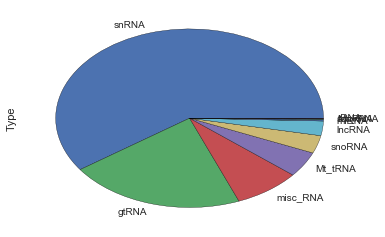

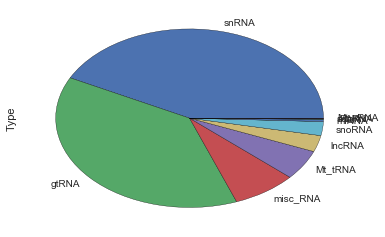

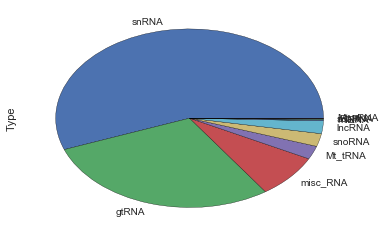

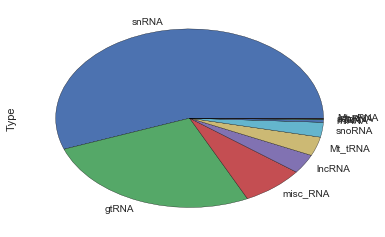

In [5]:
#Find a better way to represent this data

plt.subplots()
filtControl['Type'].value_counts().plot(kind='pie')
plt.subplots()
filtKD['Type'].value_counts().plot(kind='pie')
plt.subplots()
filtWT['Type'].value_counts().plot(kind='pie')
plt.subplots()
filtEA['Type'].value_counts().plot(kind='pie')


In [6]:
df = pd.read_csv(folderLoc+"NoctVsWT_candidates.csv",index_col=False)
df.head(10)

,Transcript,1-Reads,1-Avg,1-STDev,2-reads,2-Avg,2-STDev,P-value
0,Homo_sapiens_tRNA-Lys-CTT-2-5|gtRNA,4906,3.605993,3.074075,1778,4.394826,3.532497,8.216296e-25
1,Homo_sapiens_tRNA-Gly-TCC-2-6|gtRNA,8189,2.576505,2.292755,3762,2.976608,2.665268,3.732426e-23
2,Homo_sapiens_tRNA-Lys-CTT-1-2|gtRNA,2741,3.589201,3.101320,1014,4.271203,3.395730,2.006716e-09
3,Homo_sapiens_tRNA-Gly-TCC-3-1|gtRNA,4882,2.642360,2.336219,2171,2.938738,2.684968,2.447500e-09
4,MT-TT-201|Mt_tRNA,2564,2.442668,1.691100,967,2.063082,1.984728,5.672666e-09
5,MT-TD-201|Mt_tRNA,2618,2.317036,2.182546,946,1.808668,2.648620,4.911651e-08
6,MT-TR-201|Mt_tRNA,1036,2.453668,2.027508,519,1.849711,2.381802,7.299061e-08
7,Homo_sapiens_tRNA-Val-TAC-3-1|gtRNA,2758,2.477520,2.052794,853,2.223916,2.286161,5.491388e-06
8,SNORD118-201|snoRNA,3150,1.682540,2.252937,1615,2.004954,2.571330,3.953498e-05
9,MT-TG-201|Mt_tRNA,6179,2.355397,1.954472,1730,2.004046,2.500286,1.520438e-04


In [7]:
df = filtControl[filtControl['Gene'].str.contains('Mt_tRNA')]

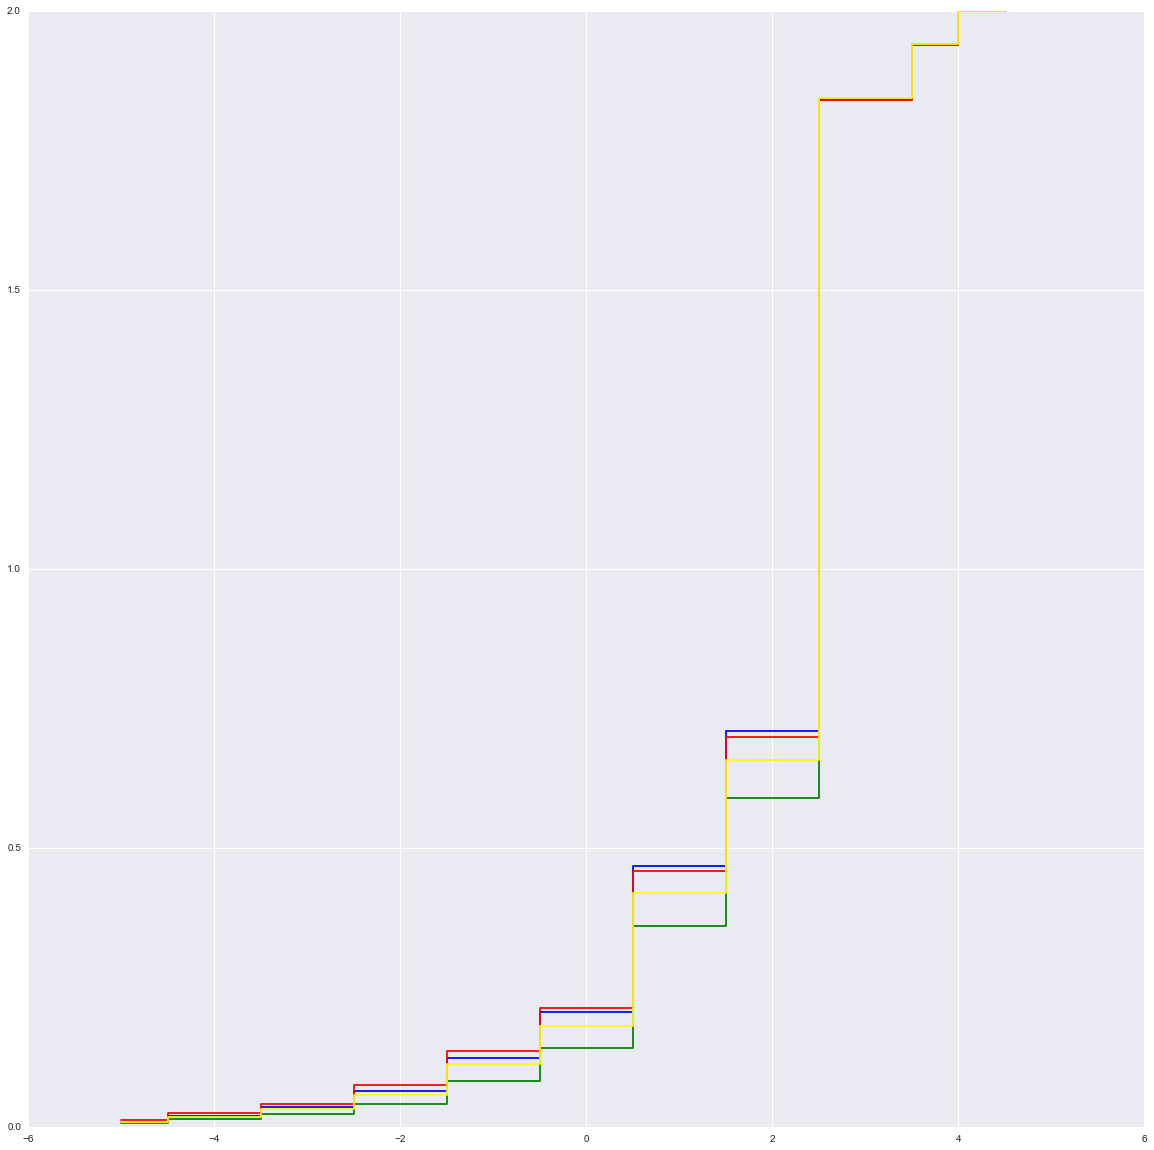

In [8]:
plt.figure(figsize=(20,20))
df = filtControl[filtControl['Gene'].str.contains('Mt_tRNA')]
values, base = np.histogram(df['3Loc']+df['TailLength'], bins=20, normed=True)
cumulative = np.cumsum(values)
plt.step(base[:-1], cumulative, c='blue')

df = filtKD[filtKD['Gene'].str.contains('Mt_tRNA')]
values, base = np.histogram(df['3Loc']+df['TailLength'], bins=20, normed=True)
cumulative = np.cumsum(values)
plt.step(base[:-1], cumulative, c='green')

df = filtWT[filtWT['Gene'].str.contains('Mt_tRNA')]
values, base = np.histogram(df['3Loc']+df['TailLength'], bins=20, normed=True)
cumulative = np.cumsum(values)
plt.step(base[:-1], cumulative, c='red')

df = filtEA[filtEA['Gene'].str.contains('Mt_tRNA')]
values, base = np.histogram(df['3Loc']+df['TailLength'], bins=20, normed=True)
cumulative = np.cumsum(values)
plt.step(base[:-1], cumulative, c='yellow')

#Cumulative plot of mitochondrial tRNA lengths

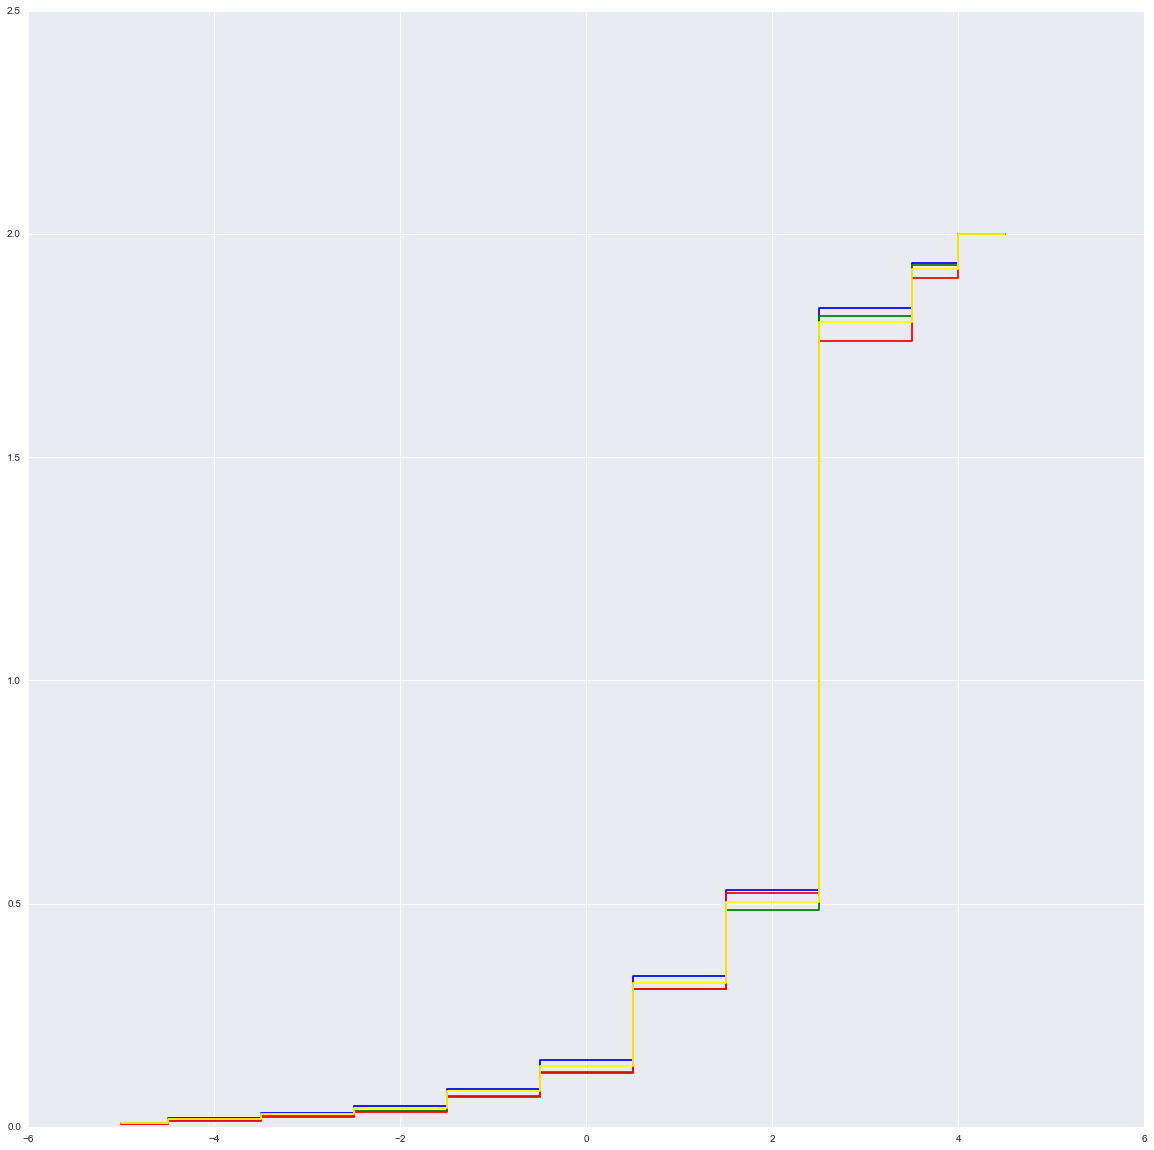

In [9]:
plt.figure(figsize=(20,20))
df = filtControl[filtControl['Gene'].str.contains('gtRNA')]
values, base = np.histogram(df['3Loc']+df['TailLength'], bins=20, normed=True)
cumulative = np.cumsum(values)
plt.step(base[:-1], cumulative, c='blue')

df = filtKD[filtKD['Gene'].str.contains('gtRNA')]
values, base = np.histogram(df['3Loc']+df['TailLength'], bins=20, normed=True)
cumulative = np.cumsum(values)
plt.step(base[:-1], cumulative, c='green')

df = filtWT[filtWT['Gene'].str.contains('gtRNA')]
values, base = np.histogram(df['3Loc']+df['TailLength'], bins=20, normed=True)
cumulative = np.cumsum(values)
plt.step(base[:-1], cumulative, c='red')

df = filtEA[filtEA['Gene'].str.contains('gtRNA')]
values, base = np.histogram(df['3Loc']+df['TailLength'], bins=20, normed=True)
cumulative = np.cumsum(values)
plt.step(base[:-1], cumulative, c='yellow')

#cumulative plots of tRNA

In [10]:
df1 = filtControl[filtControl['Gene'].str.contains('gtRNA')]
df2 = filtKD[filtKD['Gene'].str.contains('gtRNA')]
df3 = filtWT[filtWT['Gene'].str.contains('gtRNA')]
df4 = filtEA[filtEA['Gene'].str.contains('gtRNA')]


In [97]:
#TPM Calculations
df1 = filtControl[filtControl['Gene'].str.contains('tRNA')]
TPM1 = pd.DataFrame(df1['Gene'].value_counts()).rename(columns={'Gene':'Count'})
TPM1['Source'] = 'Control'
TPM1['TPM'] = TPM1['Count']/(len(filtControl)/1000000)

df2 = filtKD[filtKD['Gene'].str.contains('tRNA')]
TPM2 = pd.DataFrame(df2['Gene'].value_counts()).rename(columns={'Gene':'Count'})
TPM2['Source'] = 'siNoct'
TPM2['TPM'] = TPM2['Count']/(len(filtKD)/1000000)

df3 = filtWT[filtWT['Gene'].str.contains('tRNA')]
TPM3 = pd.DataFrame(df3['Gene'].value_counts()).rename(columns={'Gene':'Count'})
TPM3['Source'] = 'WT Addback'
TPM3['TPM'] = TPM3['Count']/(len(filtWT)/1000000)

df4 = filtEA[filtEA['Gene'].str.contains('tRNA')]
TPM4 = pd.DataFrame(df4['Gene'].value_counts()).rename(columns={'Gene':'Count'})
TPM4['Source'] = 'EA Addback'
TPM4['TPM'] = TPM4['Count']/(len(filtEA)/1000000)


dude = pd.concat([TPM1,TPM2,TPM3,TPM4])
ind = dude.index[:5]
dude=dude.ix[ind]
dude

,Count,Source,TPM
Homo_sapiens_tRNA-Asp-GTC-2-9|gtRNA,67382,Control,52799.389432
Homo_sapiens_tRNA-Asp-GTC-2-9|gtRNA,153533,siNoct,122933.204368
Homo_sapiens_tRNA-Asp-GTC-2-9|gtRNA,60702,WT Addback,85409.643233
Homo_sapiens_tRNA-Asp-GTC-2-9|gtRNA,48457,EA Addback,66398.189078
Homo_sapiens_tRNA-Glu-TTC-2-2|gtRNA,32363,Control,25359.096497
Homo_sapiens_tRNA-Glu-TTC-2-2|gtRNA,51457,siNoct,41201.395773
Homo_sapiens_tRNA-Glu-TTC-2-2|gtRNA,19365,WT Addback,27247.170459
Homo_sapiens_tRNA-Glu-TTC-2-2|gtRNA,17257,EA Addback,23646.398847
Homo_sapiens_tRNA-Glu-CTC-1-7|gtRNA,23707,Control,18576.402085
Homo_sapiens_tRNA-Glu-CTC-1-7|gtRNA,35153,siNoct,28146.853987


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

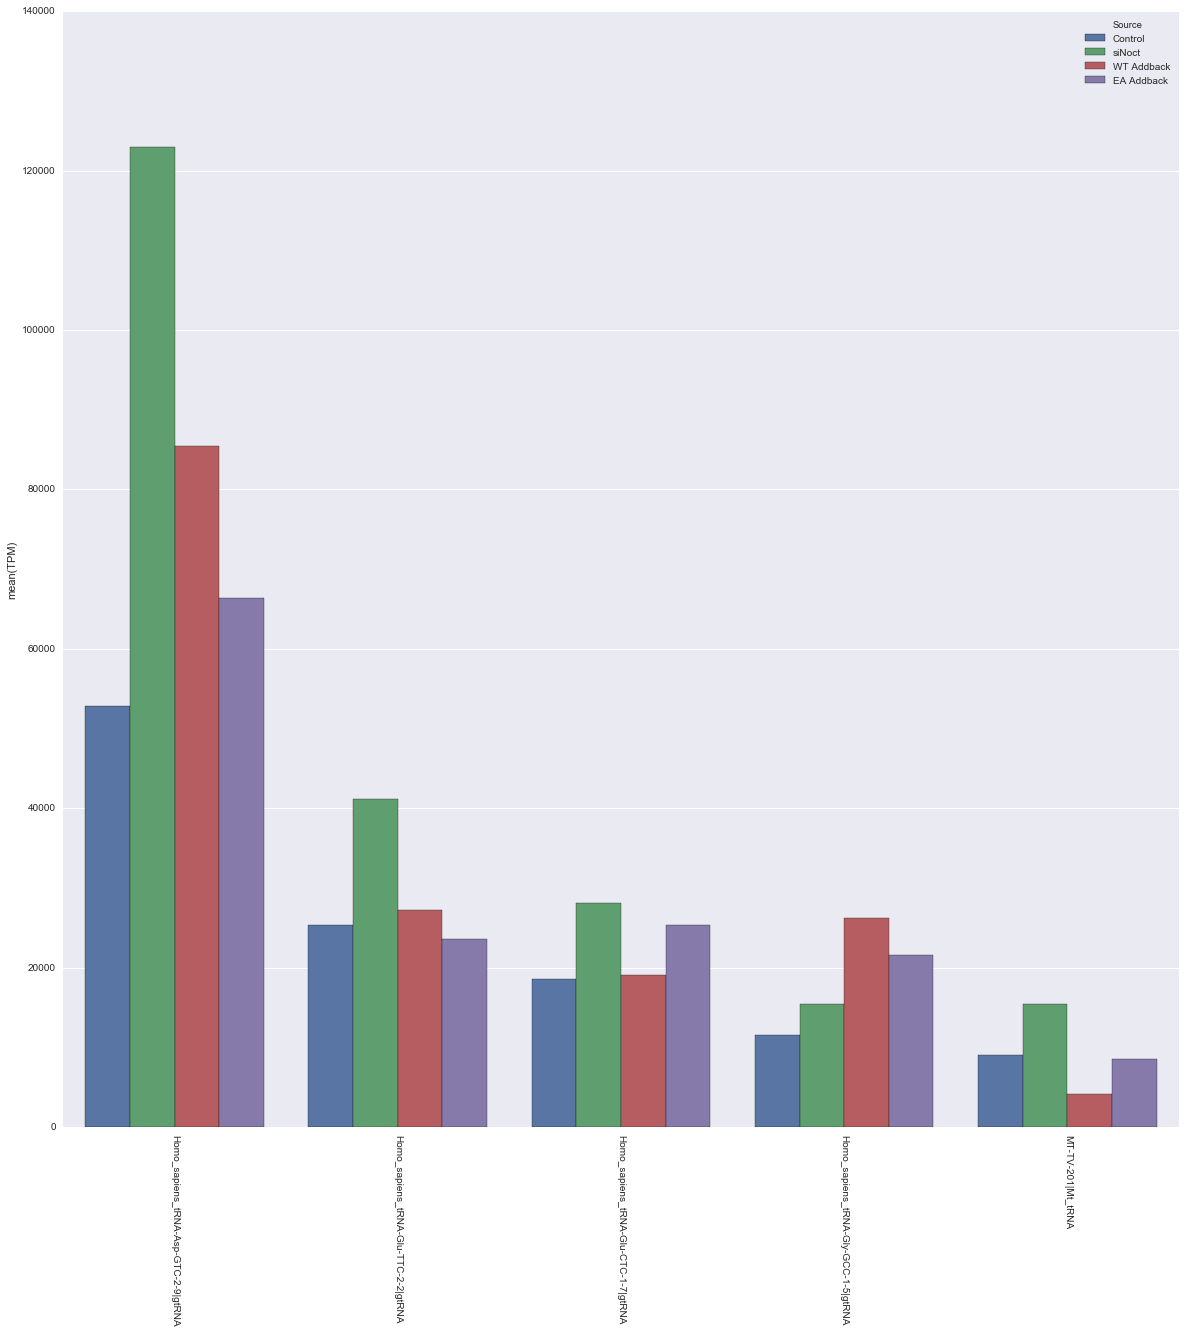

In [98]:
plt.figure(figsize=(20,20))
sns.barplot(dude.index,dude.TPM,data=dude,hue='Source')
plt.xticks(rotation=-90)


In [46]:
sns.barplot?